<a href="https://colab.research.google.com/github/srinijalanda93/Predictive_Analystics/blob/main/PA_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [4]:
cal = fetch_california_housing(as_frame=True)
df = cal.frame.copy()
X = df.drop(columns=[cal.target.name])
y = df[cal.target.name]

In [5]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [6]:
y

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [7]:
print("Dataset shape (rows, cols):", df.shape)
print("\nFeature names:", X.columns.tolist())
print("\nAny missing values?\n", df.isnull().sum())

Dataset shape (rows, cols): (20640, 9)

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Any missing values?
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [8]:
# Basic statistics
display_df = df.describe().T
# Removed dependency on caas_jupyter_tools
print("California Housing: Descriptive Statistics")
display(display_df)

California Housing: Descriptive Statistics


,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


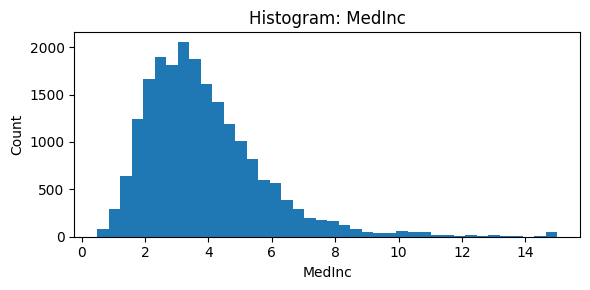

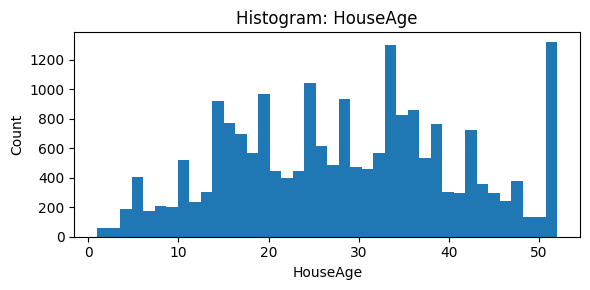

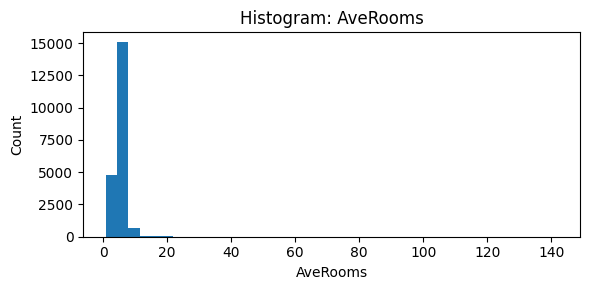

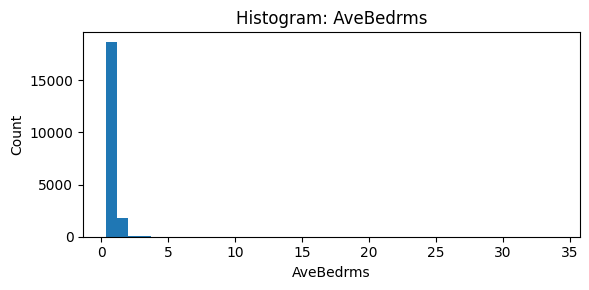

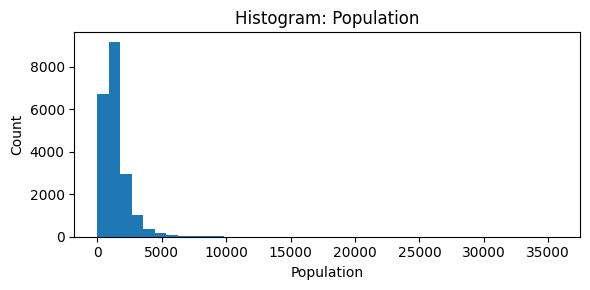

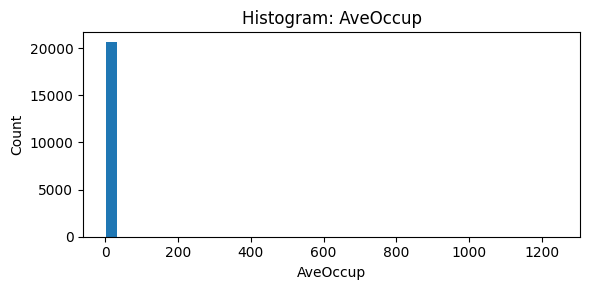

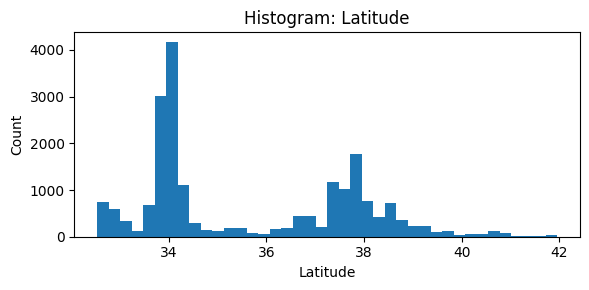

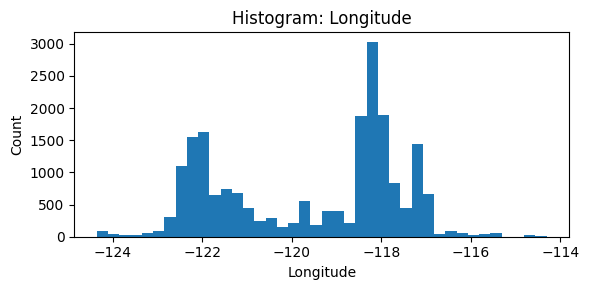

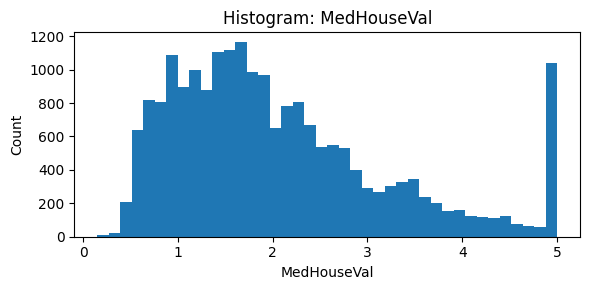

In [9]:
for col in list(X.columns) + [cal.target.name]:
    plt.figure(figsize=(6,3))
    plt.hist(df[col].values, bins=40)
    plt.title(f"Histogram: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

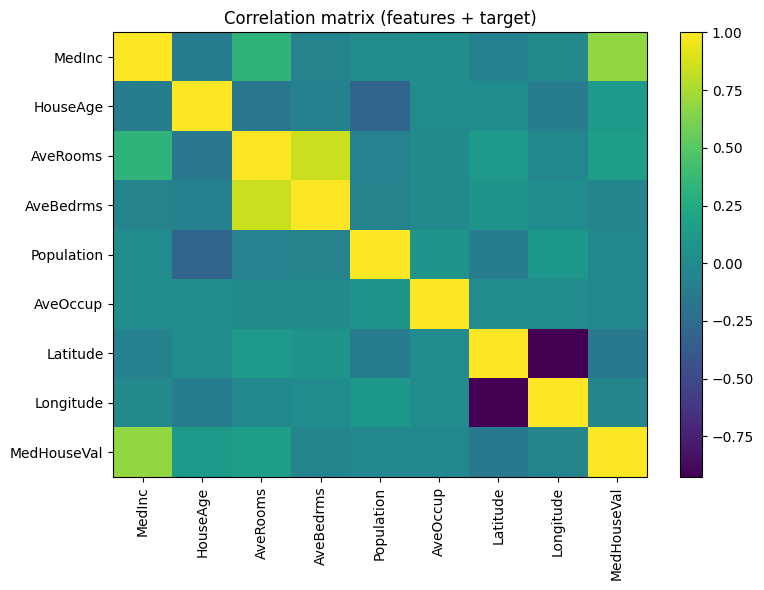

In [10]:
corr = df.corr()
plt.figure(figsize=(8,6))
plt.imshow(corr, aspect='auto', interpolation='nearest')
plt.colorbar()
plt.title("Correlation matrix (features + target)")
plt.xticks(ticks=np.arange(len(corr.columns)), labels=corr.columns, rotation=90)
plt.yticks(ticks=np.arange(len(corr.columns)), labels=corr.columns)
plt.tight_layout()
plt.show()

In [11]:
# Top 3 features most correlated (absolute) with the target
target_corr = corr[cal.target.name].drop(cal.target.name).abs().sort_values(ascending=False)
top_features = target_corr.head(3).index.tolist()
print("Top 3 features by absolute correlation with target:", top_features)


Top 3 features by absolute correlation with target: ['MedInc', 'AveRooms', 'Latitude']


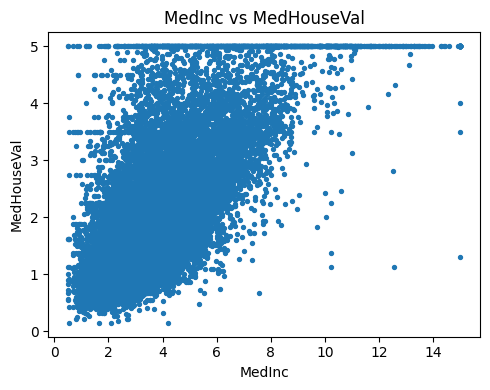

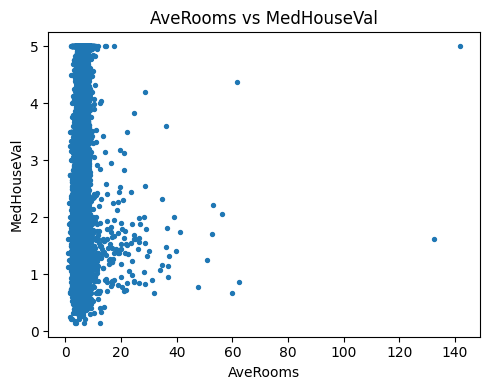

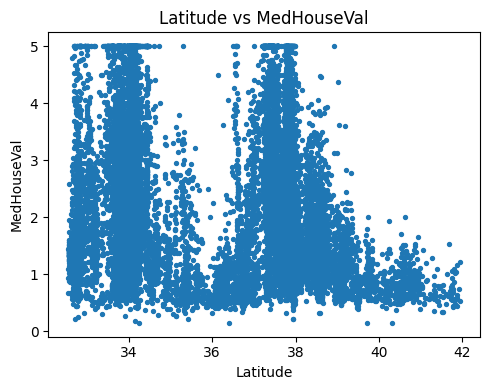

In [12]:
for feat in top_features:
    plt.figure(figsize=(5,4))
    plt.scatter(df[feat], df[cal.target.name], s=8)
    plt.title(f"{feat} vs {cal.target.name}")
    plt.xlabel(feat)
    plt.ylabel(cal.target.name)
    plt.tight_layout()
    plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTrain shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (16512, 8), Test shape: (4128, 8)


In [14]:
# Scale the features manually
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)


LinearRegression()

In [16]:
# Predictions
y_pred_lin = lin_reg.predict(X_test_scaled)

In [17]:
# Evaluation metrics
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2_lin = r2_score(y_test, y_pred_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)

In [31]:
# Cross-validation for Linear Regression
cv = KFold(n_splits=10, shuffle=True, random_state=42) # make it 10
print(cv)
cv_scores = cross_val_score(lin_reg, X_train_scaled, y_train,
                            scoring="neg_mean_squared_error", cv=cv, n_jobs=-1)

cv_rmse = np.sqrt(-cv_scores)
print("\nLinear Regression Cross-Validation:")
print(f"Mean CV RMSE: {cv_rmse.mean():.4f}")
print(f"Std CV RMSE: {cv_rmse.std():.4f}")


KFold(n_splits=10, random_state=42, shuffle=True)

Linear Regression Cross-Validation:
Mean CV RMSE: 0.7205
Std CV RMSE: 0.0239


In [19]:
print("Multiple Linear Regression Results:")
print(f"RMSE: {rmse_lin:.4f}")
print(f"R²: {r2_lin:.4f}")
print(f"MAE: {mae_lin:.4f}")

Multiple Linear Regression Results:
RMSE: 0.7456
R²: 0.5758
MAE: 0.5332


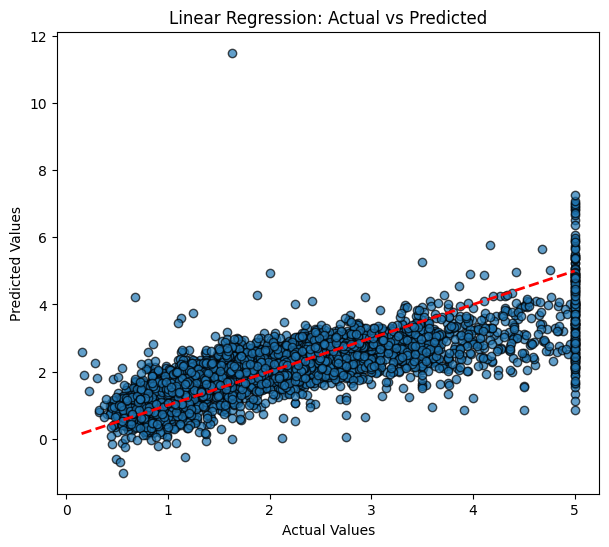

In [20]:
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_lin, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

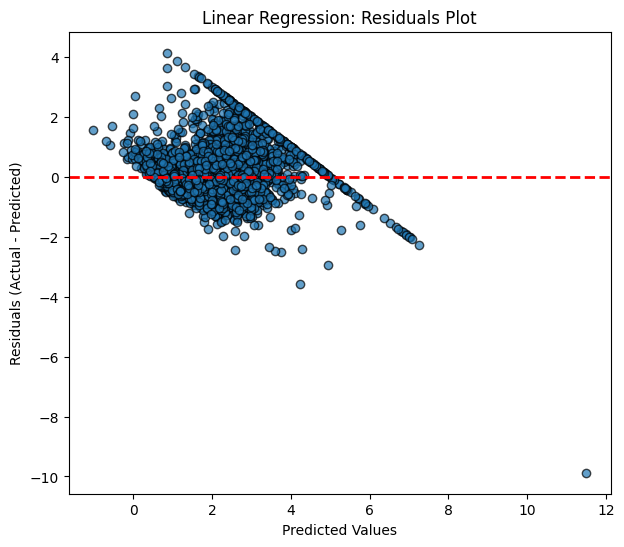

In [21]:
residuals = y_test - y_pred_lin
plt.figure(figsize=(7, 6))
plt.scatter(y_pred_lin, residuals, alpha=0.7, edgecolors='k')
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Linear Regression: Residuals Plot")
plt.show()

#Srinija Landa (2448526)

#2. Ridge Regression (L2 Regularization)

#Definition:
Ridge Regression is a linear regression technique that adds an L2 penalty (squared magnitude of coefficients) to the loss function, shrinking the coefficients but never reducing them exactly to zero.

#Why we use it:

Prevents overfitting by controlling large coefficients.

Handles multicollinearity (when features are correlated, e.g., AveRooms and AveBedrms).

Usually improves predictive performance over plain linear regression.

# -------------------------
# Ridge Regression
# -------------------------


In [22]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [23]:
# Ridge with hyperparameter tuning
ridge = Ridge()
ridge_params = {"alpha": [0.01, 0.1, 1, 10, 50, 100]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1) #here cv is Cross-validation
ridge_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 50, 100]},
             scoring='neg_mean_squared_error')

In [25]:
best_ridge = ridge_grid.best_estimator_
y_pred_ridge = best_ridge.predict(X_test_scaled)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print("\nRidge Regression Results (Best alpha = {:.2f}):".format(ridge_grid.best_params_['alpha']))
print(f"RMSE: {rmse_ridge:.2f}")
print(f"R²: {r2_ridge:.2f}")
print(f"MAE: {mae_ridge:.2f}")


Ridge Regression Results (Best alpha = 1.00):
RMSE: 0.75
R²: 0.58
MAE: 0.53


#3. Lasso Regression (L1 Regularization)

#Definition:
Lasso Regression is a linear regression method that adds an L1 penalty (absolute value of coefficients) to the loss function, which can shrink some coefficients to exactly zero, effectively performing feature selection.

#Why we use it:

Helps identify the most important features by eliminating less useful ones.

Useful when we have many predictors and want a simpler, sparse model.

Balances prediction and interpretability.

# -------------------------
# Lasso Regression
# -------------------------

In [33]:

lasso = Lasso(max_iter=5000)
lasso_params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1)
lasso_grid.fit(X_train_scaled, y_train)

best_lasso = lasso_grid.best_estimator_
y_pred_lasso = best_lasso.predict(X_test_scaled)

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print("\nLasso Regression Results (Best alpha = {:.4f}):".format(lasso_grid.best_params_['alpha']))
print(f"RMSE: {rmse_lasso:.2f}")
print(f"R²: {r2_lasso:.2f}")
print(f"MAE: {mae_lasso:.2f}")



Lasso Regression Results (Best alpha = 0.0010):
RMSE: 0.74
R²: 0.58
MAE: 0.53



Model Comparison Table:
               Model      RMSE        R²       MAE
0  Linear Regression  0.745581  0.575788  0.533200
1   Ridge Regression  0.745557  0.575816  0.533193
2   Lasso Regression  0.744642  0.576856  0.533145


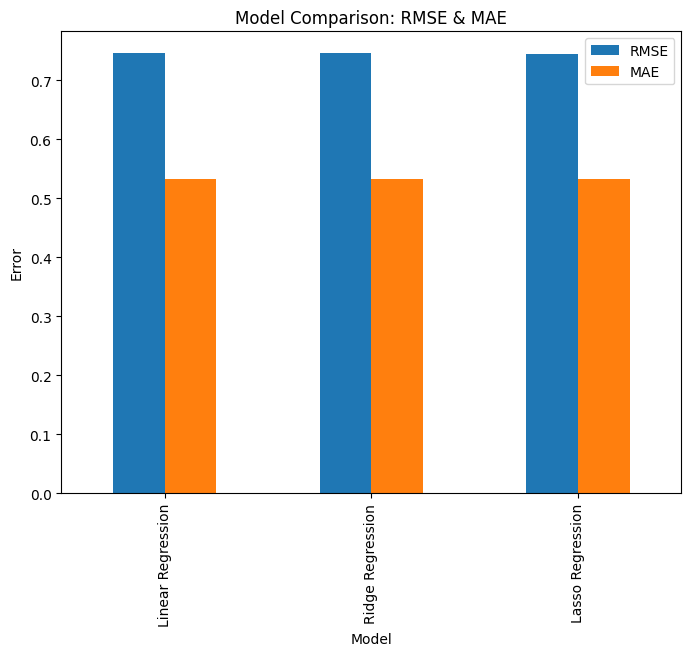

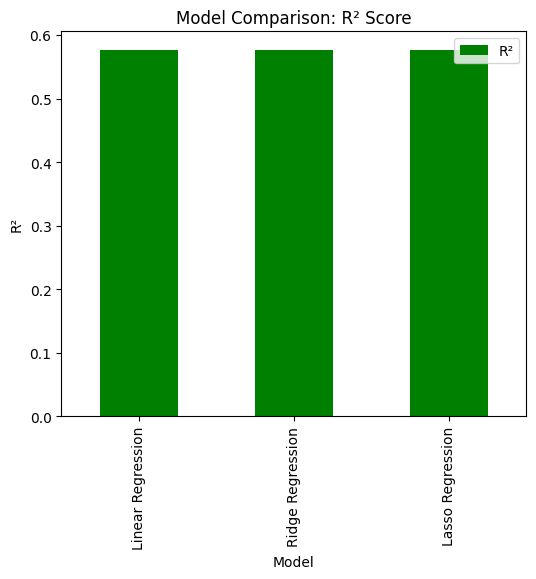

In [34]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression"],
    "RMSE": [rmse_lin, rmse_ridge, rmse_lasso],
    "R²": [r2_lin, r2_ridge, r2_lasso],
    "MAE": [mae_lin, mae_ridge, mae_lasso]
})

print("\nModel Comparison Table:")
print(results)

# Plot comparison for RMSE & MAE
results.set_index("Model")[["RMSE", "MAE"]].plot(kind="bar", figsize=(8,6))
plt.title("Model Comparison: RMSE & MAE")
plt.ylabel("Error")
plt.show()

# Plot comparison for R²
results.set_index("Model")[["R²"]].plot(kind="bar", figsize=(6,5), color="green")
plt.title("Model Comparison: R² Score")
plt.ylabel("R²")
plt.show()

In [28]:
ridge_params = {"alpha": np.logspace(-3, 3, 20)}   # from 0.001 to 1000
lasso_params = {"alpha": np.logspace(-4, 1, 20)}   # from 0.0001 to 10


In [29]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


In [32]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(max_iter=5000)
enet_params = {
    "alpha": np.logspace(-3, 1, 10),
    "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9]  # balance L1 vs L2
}
enet_grid = GridSearchCV(enet, enet_params, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1)
enet_grid.fit(X_train_scaled, y_train)

best_enet = enet_grid.best_estimator_
y_pred_enet = best_enet.predict(X_test_scaled)

rmse_enet = np.sqrt(mean_squared_error(y_test, y_pred_enet))
r2_enet = r2_score(y_test, y_pred_enet)
mae_enet = mean_absolute_error(y_test, y_pred_enet)

print("\nElasticNet Results:", enet_grid.best_params_)
print(f"RMSE: {rmse_enet:.4f}, R²: {r2_enet:.4f}, MAE: {mae_enet:.4f}")



ElasticNet Results: {'alpha': np.float64(0.001), 'l1_ratio': 0.9}
RMSE: 0.7447, R²: 0.5768, MAE: 0.5331




* **RMSE = 0.7447** (slightly better than Ridge & Linear)
* **R² = 0.5768** (on par with Lasso, a bit better than Ridge)
* **MAE = 0.5331** (basically same as others)

So, Elastic Net with `alpha=0.001` and `l1_ratio=0.9` performed best among the tested models.

---

###  Interpretation for Report / Presentation

* **Linear Regression** gave a good baseline (R² ≈ 0.576).
* **Ridge Regression** didn’t improve much because multicollinearity isn’t severe in this dataset.
* **Lasso Regression** performed slightly better since it eliminated less useful features and reduced variance.
* **Elastic Net (L1+L2)** achieved the best performance, balancing feature selection (like Lasso) and stability (like Ridge).

 **Conclusion:**
Elastic Net is the most effective model for this dataset, with the lowest RMSE and highest R². Its ability to combine both **regularization and feature selection** makes it more robust, even if the improvement over Lasso is small.

---

